# **DESAFÍO ED MACHINA**
Alen Jiménez - Febrero 2024

**EXPLORATORY DATA ANALYSIS (EDA)**

El objetivo de esta notebook es hacer un análisis exploratorio de los datos que obtuvimos en la etapa de DW. 

# Tabla de Contenidos
* 0. [Set Up General](#set_up_general)
* 1. [Análisis](#analsis)

In [29]:
# Importamos bibliotecas

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
import altair as alt
import re
import scipy
from scipy.stats import ttest_rel, levene, ttest_ind
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [30]:
# Directorio de trabajo

directorio_de_trabajo = 'C:/Users/alenj/Escritorio/proyectos/desafio_edmachina'

os.chdir(directorio_de_trabajo)

print(f'Directorio actual de trabajo: {os.getcwd()}')

Directorio actual de trabajo: C:\Users\alenj\Escritorio\proyectos\desafio_edmachina


In [31]:
# TTest

def ttest(category1_evaluations, category2_evaluations):
    
    # Test de igualdad de varianzas entre grupos

    statistic, p_value = levene(category1_evaluations
                                , category2_evaluations)

    alpha = 0.05

    if p_value > alpha:
        
        # Para varianzas "iguales"
        
        print("Equal variances assumed (p-value = {:.4f}).".format(p_value))

        statistic, p_value = ttest_ind(category1_evaluations
                                       , category2_evaluations
                                       , equal_var=True)

        if p_value < alpha:
            print("There is a significant difference in means between the two groups (p-value = {:.4f}).".format(p_value))
        else:
            print("There is no significant difference in means between the two groups (p-value = {:.4f}).".format(p_value))


    else:
        
        # Para varianzas "no iguales"
        
        print("Equal variances not assumed (p-value = {:.4f}).".format(p_value))
        
        statistic, p_value = ttest_ind(category1_evaluations
                                       , category2_evaluations
                                       , equal_var=False)

        if p_value < alpha:
            print("There is a significant difference in means between the two groups (p-value = {:.4f}).".format(p_value))
        else:
            print("There is no significant difference in means between the two groups (p-value = {:.4f}).".format(p_value))

In [32]:
# Importamos el csv

df = pd.read_csv('output/output_dw.csv', sep = ',', encoding = 'utf-8')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2638 entries, 0 to 2637
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2638 non-null   int64  
 1   user_uuid                 2638 non-null   object 
 2   periodo                   2638 non-null   int64  
 3   course_uuid               2638 non-null   object 
 4   dias_hasta_primer_examen  2638 non-null   float64
 5   semestre_2                2638 non-null   int64  
 6   aprobo                    2638 non-null   int64  
 7   nota_parcial              2638 non-null   float64
 8   score                     2479 non-null   float64
 9   tiempo_hasta_submision    2417 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 206.2+ KB


# 1. Análisis <a class = 'anchor' id = 'analsis'></a>

In [34]:
# Vemos cuantas cursadas fueron aprobadas

df.aprobo.value_counts()

aprobo
1    2573
0      65
Name: count, dtype: int64

In [35]:
df.aprobo.mean()*100

97.53601213040182

Tenemos 65 cursadas no aprobadas y 2575 (97.5%) aprobadas. Hay desbalanceo de clases.

In [36]:
# Analizamos nota de primer examen

df.nota_parcial.describe()

count    2638.000000
mean        7.199393
std         1.807279
min         0.000000
25%         6.000000
50%         7.000000
75%         9.000000
max        10.000000
Name: nota_parcial, dtype: float64

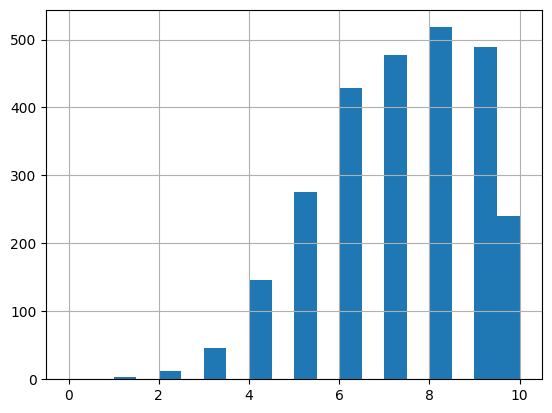

In [37]:
df.nota_parcial.hist(bins = 20);

El promedio es 7.2 y la mediana es 6, distribución con cola a la izquierda.

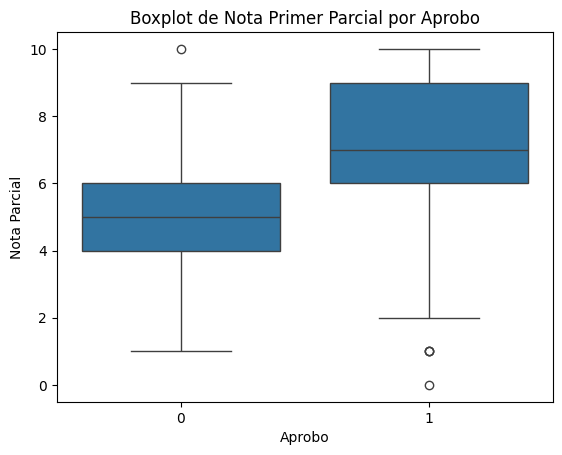

In [38]:
# Cruzamos con data de aprobacion

sns.boxplot(x='aprobo', y='nota_parcial', data=df)
plt.xlabel('Aprobo')
plt.ylabel('Nota Parcial')
plt.title('Boxplot de Nota Primer Parcial por Aprobo')
plt.show()

In [39]:
np.corrcoef(df.nota_parcial, df.aprobo)

array([[1.        , 0.18263648],
       [0.18263648, 1.        ]])

In [40]:
ttest(df.nota_parcial[df.aprobo==0]
      , df.nota_parcial[df.aprobo==1])

Equal variances not assumed (p-value = 0.0424).
There is a significant difference in means between the two groups (p-value = 0.0000).


- La correlación entre la nota del primer parcial y la probabilidad de aprobar la materia es positiva.
- La diferencia observada es estadísticamente significativa.

In [41]:
# Analizamos el score de las actividades

df.score.describe()

count    2479.000000
mean       88.254065
std        12.808239
min         0.000000
25%        82.260417
50%        91.000000
75%       100.000000
max       100.000000
Name: score, dtype: float64

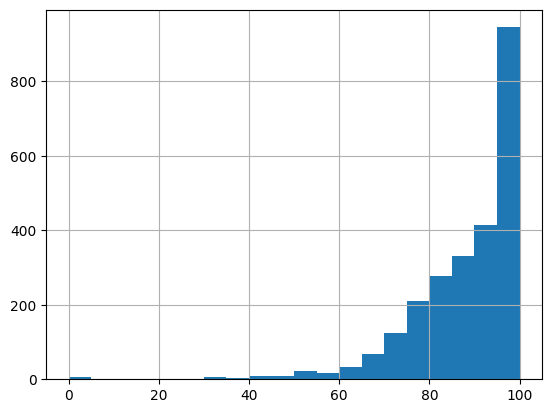

In [42]:
df.score.hist(bins = 20);

El promedio es 88.3 y la mediana es 91, distribución con cola a la izquierda.

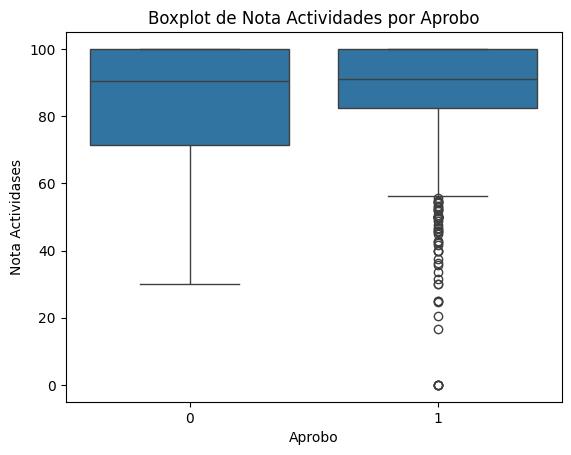

In [43]:
# Cruzamos con data de aprobacion

sns.boxplot(x='aprobo', y='score', data=df)
plt.xlabel('Aprobo')
plt.ylabel('Nota Actividases')
plt.title('Boxplot de Nota Actividades por Aprobo')
plt.show()

In [44]:
np.corrcoef(df.dropna().score, df.dropna().aprobo)

array([[1.        , 0.04394572],
       [0.04394572, 1.        ]])

In [45]:
ttest(df.dropna().score[df.dropna().aprobo==0]
      , df.dropna().score[df.dropna().aprobo==1])

Equal variances not assumed (p-value = 0.0003).
There is no significant difference in means between the two groups (p-value = 0.1397).


- La correlación entre la nota promedio de actividades y la probabilidad de aprobar la materia es positiva.
- La diferencia observada no es estadísticamente significativa.

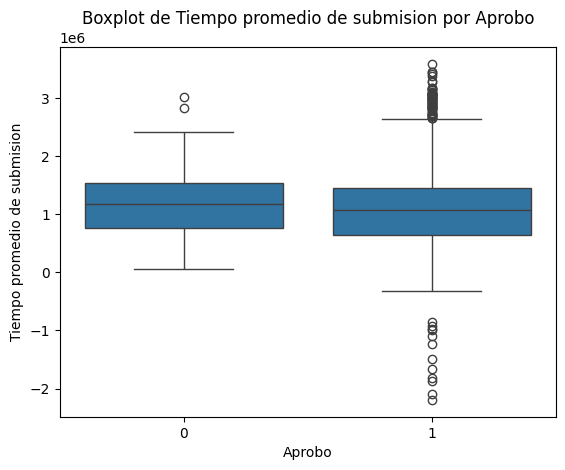

In [46]:
# Analizamos el tiempo promedio de submision

# Cruzamos con data de aprobacion

sns.boxplot(x='aprobo', y='tiempo_hasta_submision', data=df)
plt.xlabel('Aprobo')
plt.ylabel('Tiempo promedio de submision')
plt.title('Boxplot de Tiempo promedio de submision por Aprobo')
plt.show()

In [47]:
np.corrcoef(df.dropna().tiempo_hasta_submision, df.dropna().aprobo)

array([[ 1.        , -0.01985044],
       [-0.01985044,  1.        ]])

In [48]:
ttest(df.dropna().tiempo_hasta_submision[df.dropna().aprobo==0]
      , df.dropna().tiempo_hasta_submision[df.dropna().aprobo==1])

Equal variances assumed (p-value = 0.7542).
There is no significant difference in means between the two groups (p-value = 0.3293).


- La correlación entre el tiempo promedio de submision y la probabilidad de aprobar la materia es negativa.
- La diferencia observada no es estadísticamente significativa.

In [49]:
# Analizamos la cantidad de dias hasta primer examen

df.dias_hasta_primer_examen.describe()

count    2638.000000
mean       27.327521
std         6.563855
min         2.000000
25%        23.000000
50%        28.000000
75%        32.000000
max        52.000000
Name: dias_hasta_primer_examen, dtype: float64

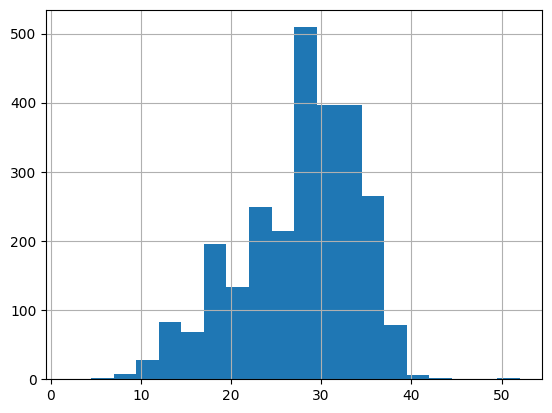

In [50]:
df.dias_hasta_primer_examen.hist(bins = 20);

El promedio es 27 y la mediana es 28, la distribución es aproximadamente simétrica.

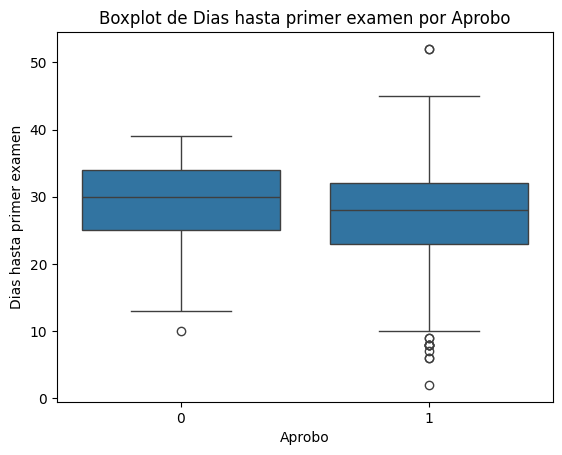

In [51]:
# Cruzamos con data de aprobacion

sns.boxplot(x='aprobo', y='dias_hasta_primer_examen', data=df)
plt.xlabel('Aprobo')
plt.ylabel('Dias hasta primer examen')
plt.title('Boxplot de Dias hasta primer examen por Aprobo')
plt.show()

In [52]:
np.corrcoef(df.dropna().dias_hasta_primer_examen, df.dropna().aprobo)

array([[ 1.        , -0.03474168],
       [-0.03474168,  1.        ]])

In [53]:
ttest(df.dropna().dias_hasta_primer_examen[df.dropna().aprobo==0]
      , df.dropna().dias_hasta_primer_examen[df.dropna().aprobo==1])

Equal variances assumed (p-value = 0.4270).
There is no significant difference in means between the two groups (p-value = 0.0877).


- La correlación entre la cantidad de dias hasta primer examen y la probabilidad de aprobar la materia es negativa.
- La diferencia observada no es estadísticamente significativa.

In [54]:
# Analizamos el segundo semestre vs el primero

df.semestre_2.value_counts()

semestre_2
0    2638
Name: count, dtype: int64